In [1]:
import numpy as np
import tqdm
import time
import csv
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import imread

%matplotlib inline


In [2]:
def flip_imgs(images, angles):
    flipped_imgs = []
    flipped_angles = []
    for image, angle in zip(images,angles):
        flipped_imgs.append(cv2.flip(image,1))
        flipped_angles.append(-1.0 * float(angle))
        
    flipped_imgs = np.array(flipped_imgs)
    flipped_angles = np.array(flipped_angles)
    return flipped_imgs, flipped_angles

In [ ]:
def data_augmentation(images_center, images_left, images_right, angles):
    

In [ ]:
flip_test = np.array(images_center[0:2])
flip_test_angle = np.array(steering_vals[0:2])

flip_test_imgs_res, flip_test_angle_res = flip_imgs(flip_test, flip_test_angle)

final_res = np.append(flip_test, flip_test_imgs_res, axis=0)

print (flip_test.shape)
print (flip_test_imgs_res.shape)
print (final_res.shape)


/home/dani/SDC/CarND-Behavioral-Cloning-P3/collected_data/run1/IMG/center_2017_02_27_21_47_36_087.jpg


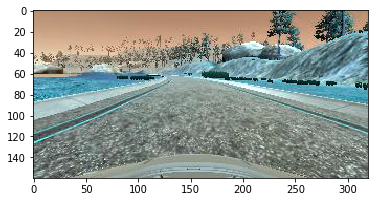

In [3]:
#csv parsing from collected data

fnames = ['./collected_data/run1/driving_log.csv', './collected_data/run2_reverse/driving_log.csv', './collected_data/run3_recover/driving_log.csv']
lines = []

for fname in fnames: 
    with open(fname) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
           lines.append(line) 

lines = np.array(lines)
images_center_path = np.array(lines[:,0])
images_left_path = np.array(lines[:,1])
images_right_path = np.array(lines[:,2])
steering_vals = np.array(lines[:,3])


images_center = []
for img_path in images_center_path:
    new_img = cv2.imread(img_path)
    images_center.append(new_img)

    
    
print(images_center_path[0])
my_img_path = '/home/dani/SDC/CarND-Behavioral-Cloning-P3/collected_data/run1/IMG/center_2017_02_27_21_47_36_087.jpg'
my_img = cv2.imread(my_img_path)
#print (len(images_center))
plt.imshow(images_center[0])

#images_center = np.array(images_center)
#print (images_center.shape)

#plt.imshow(images_center[0])

In [4]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#X_train = np.array(images_center[0:9])
#y_train = np.array(steering_vals[0:9])
flipped_images, flipped_angles = flip_imgs(images_center, steering_vals)

X_train = np.append(np.array(images_center), flipped_images, axis=0)
y_train = np.append(np.array(steering_vals), flipped_angles, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

print (X_train.shape)

(5155, 160, 320, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Lambda, Cropping2D, Convolution2D

model = Sequential()

model.add(Lambda(lambda x: x/255.0 -0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25),(0,0))))
model.add(Convolution2D(24,5,5,subsample=(2,2),activation='relu'))
model.add(Convolution2D(36,5,5,subsample=(2,2),activation='relu'))
model.add(Convolution2D(48,5,5,subsample=(2,2),activation='relu'))
model.add(Convolution2D(64,3,3,activation='relu'))
model.add(Convolution2D(64,3,3,activation='relu'))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

model.fit(X_train, y_train, nb_epoch=10, validation_split=0.2, shuffle=True)

Using TensorFlow backend.


Train on 4124 samples, validate on 1031 samples
Epoch 1/10


In [ ]:
model.save('model.h5')